In [1]:
# Connect to database
import mysql.connector
import pandas as pd

# creds

In [2]:
#Connection to the database
host = creds[2]
user = creds[0]
password = creds[1]
database = creds[3]
port = creds[4]
mydb = mysql.connector.connect(host=host, user=user, database=database, port=port, password=password, auth_plugin='mysql_native_password')
mycursor = mydb.cursor()

#Safecheck to guarantee that the connection worked
mycursor.execute('SHOW TABLES;')
print(f"Tables: {mycursor.fetchall()}")
print(mydb.connection_id) #it'll give connection_id,if got connected

Tables: [('ConsultaUrgencia_doentespedidosconsultaNeurologia2012',), ('consultaneurologia2012',), ('consultaneurologia201216anon_true',)]
628


In [3]:
# Import Alert P1 dataset
alertP1 = pd.read_sql("""SELECT * FROM ConsultaUrgencia_doentespedidosconsultaNeurologia2012""",mydb)

# Import SClinic
SClinic = pd.read_sql("""SELECT * FROM consultaneurologia201216anon_true""",mydb)

/Users/juliehaegh/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
/Users/juliehaegh/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [4]:
# Import librariers 
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from unidecode import unidecode
import re
from collections import Counter
import nltk
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/juliehaegh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/juliehaegh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:
# Remove all names in Texto variable
# This function uses a regular expression to find all words in the text that start with a 
# capital letter (\b[A-Z][a-z]+\b), which are assumed to be names
text = SClinic['Texto'] 

def remove_names(text):
    # Find all words that start with a capital letter
    names = re.findall(r'\b[A-Z][a-z]+\b', text)
    
    # Replace the names with an empty string
    for name in names:
        text = text.replace(name, '')
        
    return text

In [6]:
# Create an empty list to store the text
text_list = []

# Loop through the 'text' column
for text in text.str.lower(): # Transform every word to lower case
    text_list.append(text)

# Print the list of text
print(text_list)

['utente de 75 anos, refere tremor desde há 5 anos; esquecimentos,dificuldade em reter a informação do momento e quedas frequentes. com hta, diabetes últimas análises -2/07/14 - hb a1c-7,7; hdl ct-54, ct-193, tg-176, hb-12,2. creat-1,2; microalbuminúria-7,3 ; creat-1,2 fez tac ce-1/09/14 - acentuação dos ventriculos cerebrais. leucoencefalopatia micro-angiopática crónica. acentuação dos sulcos fronto-parietal,sobretudo à esq, ligeiras hipodensidades periféricas cerebelosas calcificação da foice inter-hemisférica, porção sup-anterior. medicada com diamicron , metformina+sitagliptina (850+50) 2xdia; irbesartan+hctz(300+12,5)1em jejum; omeprazol-20mg; sinvastatina 40mg, tromalyt 150,1cp ao almoço.', 'avaliação neurologica para avaliação da toma de anti-epilepticos e reajustamento terapeutico o doente nao tem nota de internamento em 2007 c enfarte isquémico cerebelosoe vermiani da picateve ataxia da marcha em 2007 e ficou medicado c lamotrigina 100- 1+1 e tryptizol agora refere ligeiros de

In [7]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download the Portuguese stop words
nltk.download('stopwords')
nltk.download('punkt')

# Get the Portuguese stop words
stop_words = set(stopwords.words('portuguese'))
stop_words.update(['.', ',','(',')',':','-','?','+','/',';','drª','``','','desde','doente','consulta','alterações','se',"''",'cerca','refere','hgo','utente','vossa','s','...','ainda','c','filha','costa','dr.','pereira','ja','--','p','dr','h','n','>','q','//','..','b','++','%'])

# Create a new list to store the filtered text
filtered_text = []

# Loop through the text_list and remove the stop words
for text in text_list:
    words = word_tokenize(text)
    words = [word for word in words if word.lower() not in stop_words]
    filtered_text.append(" ".join(words))

# Print the filtered text
print(filtered_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/juliehaegh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/juliehaegh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['75 anos tremor 5 anos esquecimentos dificuldade reter informação momento quedas frequentes hta diabetes últimas análises -2/07/14 hb a1c-7,7 hdl ct-54 ct-193 tg-176 hb-12,2 creat-1,2 microalbuminúria-7,3 creat-1,2 fez tac ce-1/09/14 acentuação ventriculos cerebrais leucoencefalopatia micro-angiopática crónica acentuação sulcos fronto-parietal sobretudo esq ligeiras hipodensidades periféricas cerebelosas calcificação foice inter-hemisférica porção sup-anterior medicada diamicron metformina+sitagliptina 850+50 2xdia irbesartan+hctz 300+12,5 1em jejum omeprazol-20mg sinvastatina 40mg tromalyt 150,1cp almoço', 'avaliação neurologica avaliação toma anti-epilepticos reajustamento terapeutico nao nota internamento 2007 enfarte isquémico cerebelosoe vermiani picateve ataxia marcha 2007 ficou medicado lamotrigina 100- 1+1 tryptizol agora ligeiros desiquilibrios exame neurologico sumario parece completamente normal', 'cefaleias', 'sexo feminino 30 anos idade aparentemente saidável história cef

In [8]:
# Save the filtered text as a new column to the dataframe
SClinic['filtered_text'] = filtered_text

In [21]:
#triage and post triage
refused=SClinic[SClinic['COD_MOTIVO_RECUSA']>0]
refused_number=refused.shape[0]

triage_negative=refused[refused['COD_MOTIVO_RECUSA'].isin ([1,2,3,6,7,10,16,18,19,50,51,52,54])]
triage_negative_number=triage_negative.shape[0]
triage_positive_number=refused_number-triage_negative_number

post_triage_negative=refused[refused['COD_MOTIVO_RECUSA'].isin ([14,15,20,53])]
post_triage_negative_number=post_triage_negative.shape[0]
post_triage_positive_number=triage_positive_number-post_triage_negative_number

triage= pd.DataFrame({'triage outcome':['Negative','Positive'], 'percentage from refused referrals': [round(100*(triage_negative_number/refused_number)),round(100*(triage_positive_number/refused_number))]})
post_triage= pd.DataFrame({'post triage outcome':['Negative','Positive'], 'percentage from positive triage outcome': [round(100*(post_triage_negative_number/triage_positive_number)),round(100*(post_triage_positive_number/triage_positive_number))]})

SClinic['result'] = ['Accepted' if x in [0,14,25,20,53,8,12,12] else 'Refused' for x in SClinic['COD_MOTIVO_RECUSA']]

In [22]:
# Create a boolean mask to identify rows containing the words "anos" and "idade" in the "Texto" column
mask2 = SClinic['filtered_text'].str.contains('anos') & SClinic['filtered_text'].str.contains('idade')

# Use the boolean mask to extract all the rows that contain the desired words
extracted_rows2 = SClinic[mask2]

# Save the extracted rows as a new data frame
number_years_df = extracted_rows2.copy()

# Extract the numbers before "anos" and save it as a new column "Age"
number_years_df['Age'] = number_years_df['Texto'].str.extract(r'(\d+) anos')

# Convert the "Age" column from string to integer, converting non-numeric values to NaN
number_years_df['Age'] = pd.to_numeric(number_years_df['Age'], errors='coerce')

# Drop the rows with NaN values in the "Age" column
number_years_df = number_years_df.dropna(subset=['Age'])

number_years_df[['filtered_text','Age','result']]

,filtered_text,Age,result
0,75 anos tremor 5 anos esquecimentos dificuldad...,75.0,Accepted
3,sexo feminino 30 anos idade aparentemente said...,30.0,Accepted
5,sexo feminino 54 anos recorre médica assistent...,54.0,Accepted
14,64 anos autonoma actividades vida diaria queix...,64.0,Refused
22,sexo feminino 15 anos ap regurgitação mitral l...,15.0,Accepted
...,...,...,...
1734,74 anos dislipidémia hipertensão arterial ater...,74.0,Accepted
1735,77 anos idade comportamento marcha pedida neur...,77.0,Accepted
1760,36 anos idade natural antónio cacém 11º ano es...,36.0,Accepted
1763,problema saúde resolver parkinsonismo/paralisi...,83.0,Accepted


In [29]:
# Create a new column with age range
number_years_df['Age_range'] = number_years_df['Age'].apply(lambda x: '1-20' if (20 > x >= 1) else '20-40' if (40 > x > 20) else '40-60' if (60 > x > 40) else '60-80' if (80 > x > 60) else '80-100' if (100 > x > 80) else '100>' if (100 > x) else '0')

number_years_df[['filtered_text','Age_range','result']]

,filtered_text,Age_range,result
0,75 anos tremor 5 anos esquecimentos dificuldad...,60-80,Accepted
3,sexo feminino 30 anos idade aparentemente said...,20-40,Accepted
5,sexo feminino 54 anos recorre médica assistent...,40-60,Accepted
14,64 anos autonoma actividades vida diaria queix...,60-80,Refused
22,sexo feminino 15 anos ap regurgitação mitral l...,1-20,Accepted
...,...,...,...
1734,74 anos dislipidémia hipertensão arterial ater...,60-80,Accepted
1735,77 anos idade comportamento marcha pedida neur...,60-80,Accepted
1760,36 anos idade natural antónio cacém 11º ano es...,20-40,Accepted
1763,problema saúde resolver parkinsonismo/paralisi...,80-100,Accepted


In [31]:
# Group the data by age range and accepted/rejected
accepted_rejected_counts = number_years_df.groupby(['Age_range', 'result']).size().reset_index(name='counts').sort_values(by = 'Age_range')

# Print result
accepted_rejected_counts

,Age_range,result,counts
0,1-20,Accepted,31
1,1-20,Refused,11
2,100>,Accepted,13
3,100>,Refused,2
4,20-40,Accepted,27
5,20-40,Refused,8
6,40-60,Accepted,43
7,40-60,Refused,19
8,60-80,Accepted,142
9,60-80,Refused,39


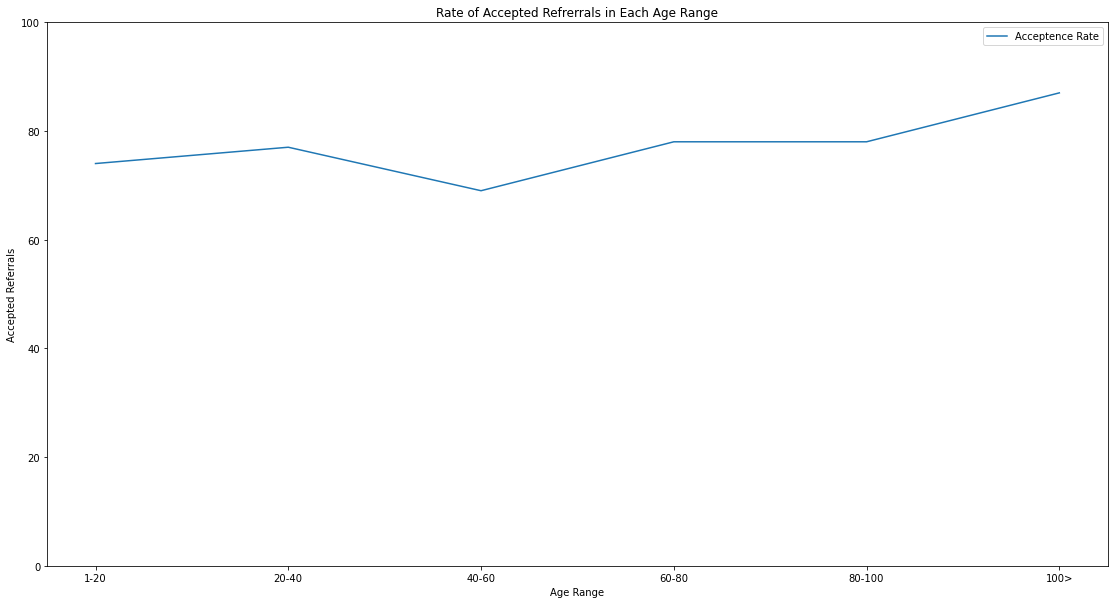

In [33]:
x = ['1-20','20-40','40-60','60-80','80-100','100>']

# Percentage rate
y1 = [74,77,69,78,78,87]

fig = plt.figure()
fig.set_size_inches(19, 10)

ax = plt.gca()
ax.set_ylim([0, 100])

# Plotting two lines on the same graph
plt.plot(x, y1, label='Acceptence Rate')

plt.xlabel('Age Range')
plt.ylabel('Accepted Referrals')
plt.title('Rate of Accepted Refrerrals in Each Age Range')
plt.legend() # Show the legend
plt.show()